# Chapter 8 - Example 2

# Chapter 8 - NLL with Gaussian distribution (Information Theory)

NLL: [33412.77632594]; theta_mu: [0.5]; theta_sigma: [10.]
NLL: [33399.96521159]; theta_mu: [0.50994945]; theta_sigma: [9.98899788]
NLL: [33387.13675398]; theta_mu: [0.51989776]; theta_sigma: [9.97798948]
NLL: [33374.29093391]; theta_mu: [0.52984492]; theta_sigma: [9.96697481]
NLL: [33361.42790283]; theta_mu: [0.53979092]; theta_sigma: [9.95595413]
NLL: [33348.54781286]; theta_mu: [0.54973576]; theta_sigma: [9.9449277]
NLL: [33335.65081631]; theta_mu: [0.55967945]; theta_sigma: [9.93389576]
NLL: [33322.73706529]; theta_mu: [0.56962198]; theta_sigma: [9.92285856]
NLL: [33309.80671128]; theta_mu: [0.57956335]; theta_sigma: [9.91181635]
NLL: [33296.85990473]; theta_mu: [0.58950355]; theta_sigma: [9.90076937]
NLL: [33283.89679468]; theta_mu: [0.59944259]; theta_sigma: [9.88971786]
NLL: [33270.9175284]; theta_mu: [0.60938046]; theta_sigma: [9.87866207]
NLL: [33257.92225104]; theta_mu: [0.61931716]; theta_sigma: [9.86760221]
NLL: [33244.91110528]; theta_mu: [0.62925268]; theta_sigma: [9.8565

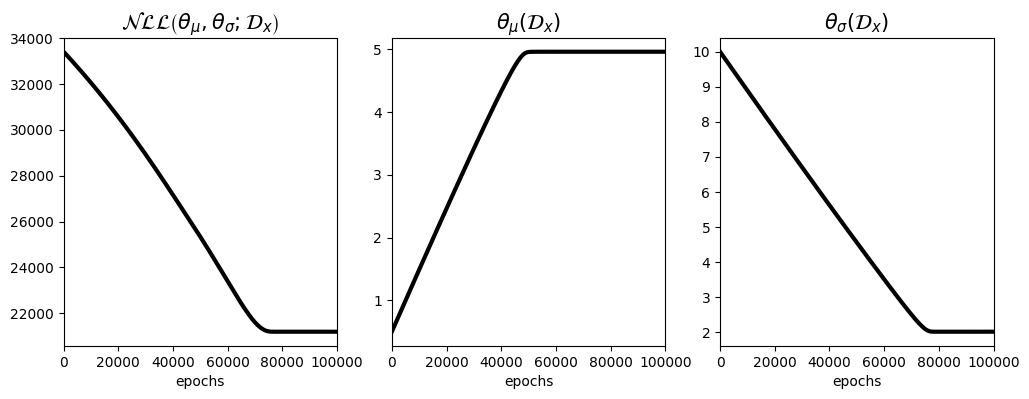

In [1]:
# Source: https://stackoverflow.com/questions/72469496/
#how-to-use-pytorch-for-maximum-likelihood-estimation-with-restrict
#-optimization
import numpy as np
import torch
from matplotlib import pyplot as plt

'''
Gaussian probability distribution
'''
# Fix the pseudo-random generator see to grant reproductibility
torch.manual_seed(0)
# Create a dataset of nX samples from normal distribution
N = 10000
# real mean
mu_X = torch.tensor(np.array([5.0]),
                    dtype=torch.float64,
                    requires_grad=False).tile((N,))
# real standard deviation
sigma_X = torch.tensor(np.array([2.0]),
                    dtype=torch.float64,
                    requires_grad=False)

# generate random samples from p=N(mu_X, sigma_X)
D_X = torch.normal(mean=mu_X, std=sigma_X)
D_X.requires_grad = False

# Initialize the values of the estimators
theta_mu = torch.tensor(np.array([0.5]),
                        dtype=torch.float64,
                        requires_grad=True)
theta_sigma = torch.tensor(np.array([10.0]),
                           dtype=torch.float64,
                           requires_grad=True)

# Define the optimizer
learning_rate = 0.0001
optimizer = torch.optim.AdamW([theta_mu, theta_sigma], lr = learning_rate)

n_e = 100000

# Minimize the Negative Log-Likelihood iteratively
track_nll=[]
track_theta_mu = []
track_theta_sigma = []
for epoch in range(n_e):
  # Compute negative log-likelihood
  nll = N*(0.5*np.log(2.0*np.pi)+theta_sigma.log())
  nll+= ((((D_X-theta_mu)/theta_sigma).pow(2))/2.0).sum()
  optimizer.zero_grad()
  nll.backward()


  if epoch % 100 == 0:
    print("NLL: {}; theta_mu: {}; theta_sigma: {}".format(nll.data.numpy(),
                                                          theta_mu.data.numpy(),
                                                          theta_sigma.data.numpy()))
  optimizer.step()
  track_nll.append(float(nll))
  track_theta_mu.append(float(theta_mu))
  track_theta_sigma.append(float(theta_sigma))

# plot convergence curves
fig, ax = plt.subplots(nrows=1, ncols=3, sharex=True, figsize=(12,4))
ax[0].plot(track_nll,
           color='k',
           linewidth=3,
           label=r"$\mathcal{NLL}$")
ax[1].plot(track_theta_mu,
           color='k',
           linewidth=3,
           label=r"$\theta_\mu$")
ax[2].plot(track_theta_sigma,
           color='k',
           linewidth=3,
           label=r"$\theta_\sigma$")
ax[0].set_xlim(0,n_e)
ax[0].set_xlabel("epochs")
ax[1].set_xlabel("epochs")
ax[2].set_xlabel("epochs")
ax[0].set_title(r"$\mathcal{NLL}\left(\theta_\mu,\theta_\sigma;\mathcal{D}_x\right)$", fontsize=15)
ax[1].set_title(r"$\theta_\mu\left(\mathcal{D}_x\right)$",
                fontsize=15)
ax[2].set_title(r"$\theta_\sigma\left(\mathcal{D}_x\right)$",
                fontsize=15)
fig.savefig("NLL_gauss.png", dpi=300, bbox_inches="tight")

# Chapter 8 - NLL with Laplace distribution (Information Theory)

NLL: [34704.48490458]; theta_mu: [0.5]; theta_sigma: [10.]
NLL: [34689.79406034]; theta_mu: [0.509949]; theta_sigma: [9.9889975]
NLL: [34675.07909494]; theta_mu: [0.51990199]; theta_sigma: [9.97798765]
NLL: [34660.34162866]; theta_mu: [0.52985717]; theta_sigma: [9.96697046]
NLL: [34645.58167149]; theta_mu: [0.53981455]; theta_sigma: [9.95594623]
NLL: [34630.79306061]; theta_mu: [0.54977716]; theta_sigma: [9.94491525]
NLL: [34615.97619567]; theta_mu: [0.55974453]; theta_sigma: [9.93387777]
NLL: [34601.1316029]; theta_mu: [0.56971614]; theta_sigma: [9.92283408]
NLL: [34586.27278113]; theta_mu: [0.57968522]; theta_sigma: [9.91178446]
NLL: [34571.40331322]; theta_mu: [0.58964974]; theta_sigma: [9.9007292]
NLL: [34556.52449586]; theta_mu: [0.59960959]; theta_sigma: [9.8896686]
NLL: [34541.6302149]; theta_mu: [0.60956831]; theta_sigma: [9.87860294]
NLL: [34526.71055183]; theta_mu: [0.6195314]; theta_sigma: [9.86753248]
NLL: [34511.76910271]; theta_mu: [0.62949697]; theta_sigma: [9.85645748]


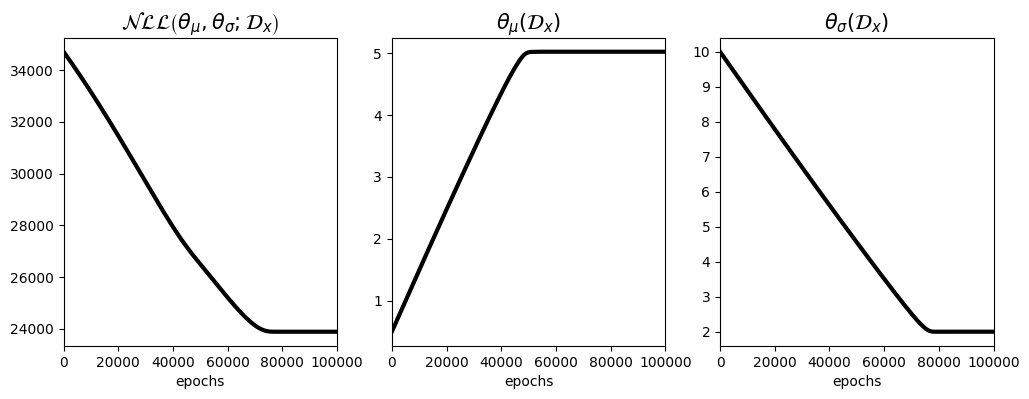

In [2]:
# Source: https://stackoverflow.com/questions/72469496/
#how-to-use-pytorch-for-maximum-likelihood-estimation-with-restrict
#-optimization
import numpy as np
import torch
from matplotlib import pyplot as plt

'''
Laplace probability distribution
'''
from torch.distributions.laplace import Laplace
# Fix the pseudo-random generator see to grant reproductibility
torch.manual_seed(0)
# Create a dataset of nX samples from normal distribution
N = 10000
# real mean
mu_X = torch.tensor(np.array([5.0]),
                    dtype=torch.float64,
                    requires_grad=False).tile((N,))
# real standard deviation
sigma_X = torch.tensor(np.array([2.0]),
                    dtype=torch.float64,
                    requires_grad=False)

# generate random samples from p=N(mu_X, sigma_X)
generator = Laplace(mu_X, sigma_X)
D_X = generator.sample()
D_X.requires_grad = False

# Initialize the values of the estimators
theta_mu = torch.tensor(np.array([0.5]),
                        dtype=torch.float64,
                        requires_grad=True)
theta_sigma = torch.tensor(np.array([10.0]),
                           dtype=torch.float64,
                           requires_grad=True)

# Define the optimizer
learning_rate = 0.0001
optimizer = torch.optim.AdamW([theta_mu, theta_sigma], lr = learning_rate)

n_e = 100000

# Minimize the Negative Log-Likelihood iteratively
track_nll=[]
track_theta_mu = []
track_theta_sigma = []
for epoch in range(n_e):
  # Compute negative log-likelihood
  nll = N*(np.log(2.0)+theta_sigma.log())
  nll+= (D_X-theta_mu).abs().sum()/theta_sigma.abs()
  optimizer.zero_grad()
  nll.backward()


  if epoch % 100 == 0:
    print("NLL: {}; theta_mu: {}; theta_sigma: {}".format(nll.data.numpy(),
                                                          theta_mu.data.numpy(),
                                                          theta_sigma.data.numpy()))
  optimizer.step()
  track_nll.append(float(nll))
  track_theta_mu.append(float(theta_mu))
  track_theta_sigma.append(float(theta_sigma))

# plot convergence curves
fig, ax = plt.subplots(nrows=1, ncols=3, sharex=True, figsize=(12,4))
ax[0].plot(track_nll,
           color='k',
           linewidth=3,
           label=r"$\mathcal{NLL}$")
ax[1].plot(track_theta_mu,
           color='k',
           linewidth=3,
           label=r"$\theta_\mu$")
ax[2].plot(track_theta_sigma,
           color='k',
           linewidth=3,
           label=r"$\theta_\sigma$")
ax[0].set_xlim(0,n_e)
ax[0].set_xlabel("epochs")
ax[1].set_xlabel("epochs")
ax[2].set_xlabel("epochs")
ax[0].set_title(r"$\mathcal{NLL}\left(\theta_\mu,\theta_\sigma;\mathcal{D}_x\right)$",
                fontsize=15)
ax[1].set_title(r"$\theta_\mu\left(\mathcal{D}_x\right)$",
                fontsize=15)
ax[2].set_title(r"$\theta_\sigma\left(\mathcal{D}_x\right)$",
                fontsize=15)
fig.savefig("NLL_laplace.png", dpi=300, bbox_inches="tight")

In [5]:
# Chapter 8 - Example 2
# Source: https://pytorch.org/docs/stable/generated/torch.nn.KLDivLoss.html
from torch import nn
import torch.nn.functional as F
# loss = loss_pointwise.sum() / input.size(0)
kl_loss = nn.KLDivLoss(reduction="batchmean")
# input should be a distribution in the log space
ptheta = F.log_softmax(torch.randn(3, 5, requires_grad=True), dim=1)
# Sample a batch of distributions. Usually this would come from the dataset
p = F.softmax(torch.rand(3, 5), dim=1)
output = kl_loss(ptheta, p)

# alternatively
kl_loss = nn.KLDivLoss(reduction="batchmean", log_target=True)
log_target = F.log_softmax(torch.rand(3, 5), dim=1)
output = kl_loss(ptheta, log_target)